In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [49]:
df = pd.read_csv("def_area_2004_2019.csv")
df.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [50]:
df.shape

(16, 11)

In [51]:
df.isnull().sum()

Ano/Estados    0
AC             0
AM             0
AP             0
MA             0
MT             0
PA             0
RO             0
RR             0
TO             0
AMZ LEGAL      0
dtype: int64

In [52]:
df.describe()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2011.500000,357.625000,776.562500,38.500000,519.875000,2691.562500,3923.625000,1392.437500,243.187500,77.562500,10020.937500
std,4.760952,172.476037,300.648625,23.557023,316.705305,2940.367595,1945.802487,943.567413,150.567468,63.238141,6112.467134
min,2004.000000,167.000000,405.000000,8.000000,209.000000,757.000000,1741.000000,435.000000,121.000000,21.000000,4571.000000
25%,2007.750000,256.250000,568.000000,24.000000,257.750000,1108.750000,2411.250000,842.000000,139.000000,46.750000,6365.250000
50%,2011.500000,292.500000,661.000000,30.500000,399.500000,1525.500000,3389.000000,1189.500000,198.500000,57.500000,7500.000000
75%,2015.250000,409.500000,1012.000000,47.750000,722.750000,2823.000000,5546.250000,1434.750000,269.250000,82.250000,11966.000000
max,2019.000000,728.000000,1421.000000,100.000000,1271.000000,11814.000000,8870.000000,3858.000000,617.000000,271.000000,27772.000000


In [53]:
def bar_plot(value):
    plot = sns.color_palette("Greens", df.shape[0] + 15)
    values = df["AMZ LEGAL"].copy().values
    values.sort()
    return plot[values.tolist().index(value) + 10]

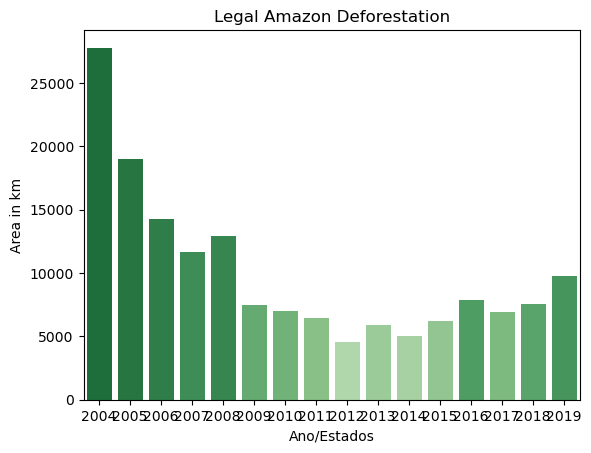

In [54]:
sns.barplot(x="Ano/Estados", y="AMZ LEGAL", palette=df["AMZ LEGAL"].apply(bar_plot), data=df)
plt.title("Legal Amazon Deforestation")
plt.ylabel("Area in km")
plt.show()

#### Modeling

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [100]:
label_encoder = LabelEncoder()
df['AMZ LEGAL'] = label_encoder.fit_transform(df['AMZ LEGAL'])

In [102]:
X = df.drop(columns=['AMZ LEGAL', 'Ano/Estados'])
y = df['AMZ LEGAL'] 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [88]:
# X = df.drop(columns=["AMZ LEGAL"])
# y = df["AMZ LEGAL"]

In [89]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [96]:
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

In [97]:
# unique_labels = set(y)
# print("Unique Labels:", unique_labels)

In [105]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [106]:
y_pred = clf.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

D:\gfg\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\gfg\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\gfg\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\gfg\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and 

In [98]:
# mask = (y_mapped == 0) | (y_mapped == 1) | (y_mapped == 2) | (y_mapped == 3) | (y_mapped == 4) | (y_mapped == 5) | (y_mapped == 6) | (y_mapped == 7) | (y_mapped == 8) | (y_mapped == 9)  
# X_train_filtered = X_train[mask]
# y_mapped_filtered = y_mapped[mask]

In [108]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



In [110]:
new_data_point = {
    'AC': 1500,
    'AM': 1200,
    'AP': 800,
    'MA': 3000,
    'MT': 2500,
    'PA': 3500,
    'RO': 1000,
    'RR': 600,
    'TO': 2000,
}
new_data_df = pd.DataFrame([new_data_point])
predicted_class = clf.predict(new_data_df)
predicted_label = label_encoder.inverse_transform(predicted_class)
print("Predicted Class:", predicted_label[0])
print("""Class 0: No Deforestation
Class 1: Low Deforestation
Class 2: Moderate Deforestation
Class 3: High Deforestation"""
      )


Predicted Class: 12
Class 0: No Deforestation
Class 1: Low Deforestation
Class 2: Moderate Deforestation
Class 3: High Deforestation
